In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### jobs-online-raw.csv is the monthly unadjusted data from: https://www.mbie.govt.nz/business-and-employment/employment-and-skills/labour-market-reports-data-and-analysis/jobs-online/#about-jobs-online

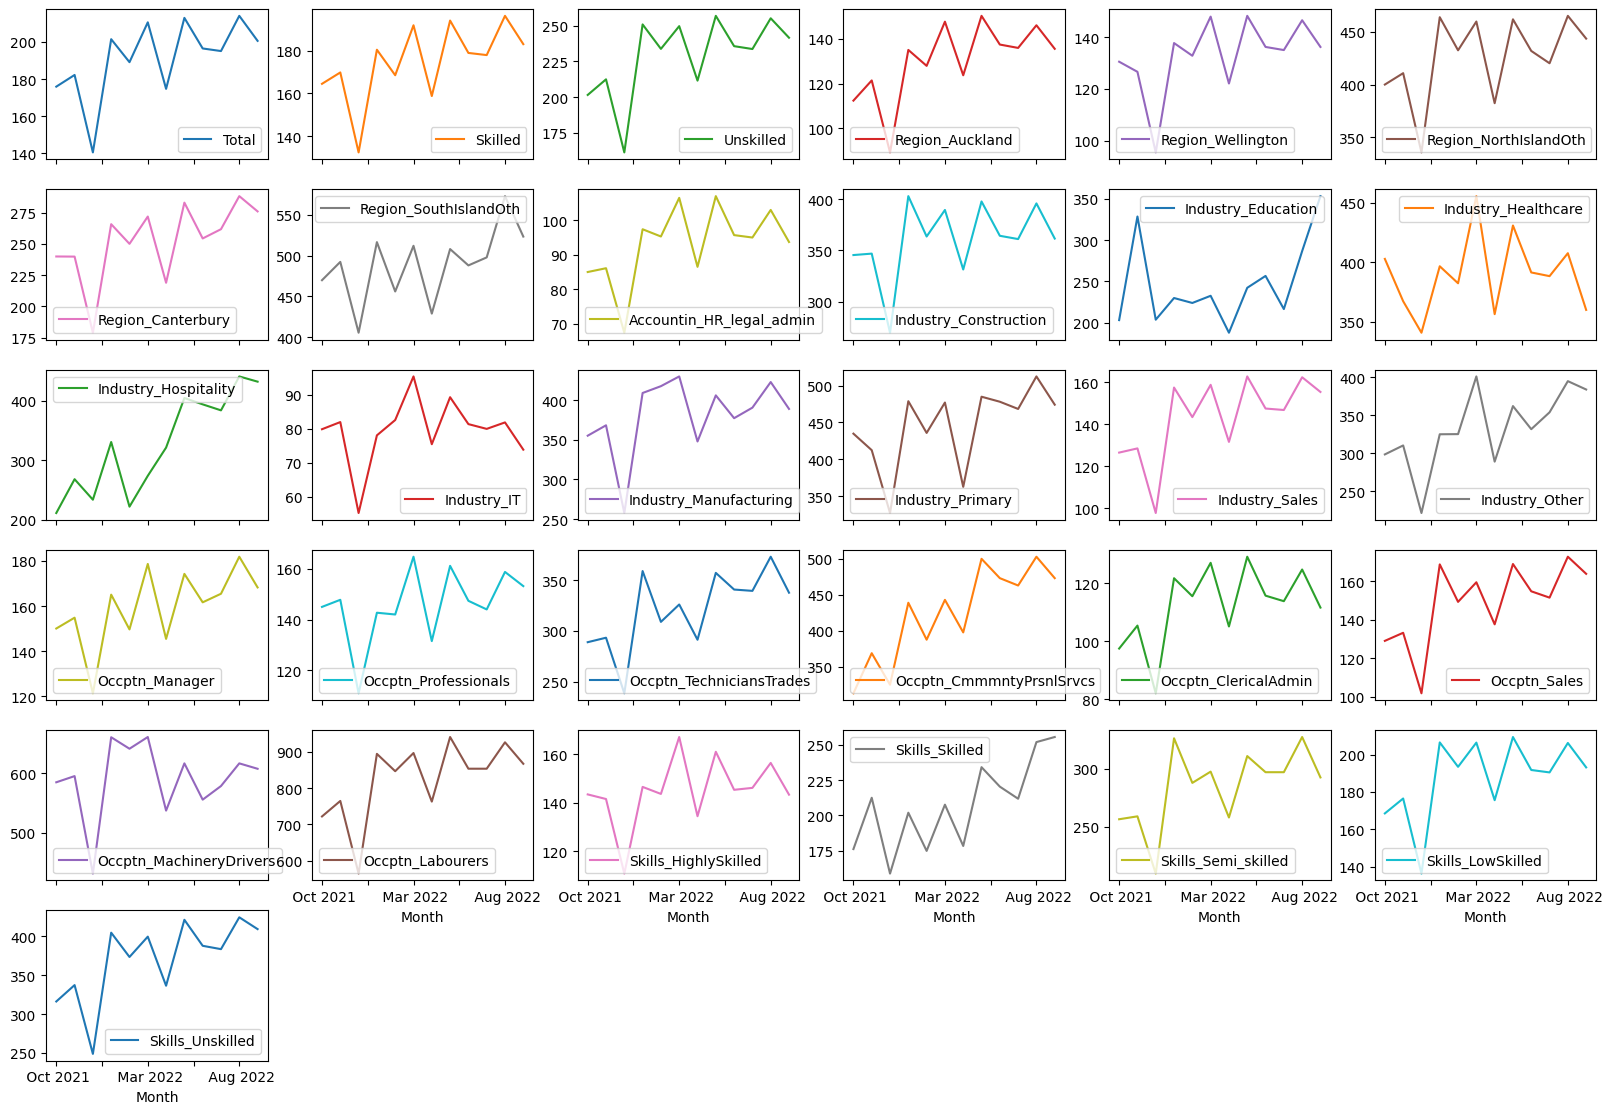

In [92]:
# this url will presumably change from month to month - remains to be seen if format is the same
#sep_22_data_release = "https://www.mbie.govt.nz/assets/Data-Files/Business-employment/Employment-skills/Labour-market-reports/jobs-online-monthly/jol-monthly-unadjusted-series-from-may-2007-to-september-2022.csv"
# the above does not read with a pd.read_csv call

# reading from manual download instead
df = pd.read_csv('data/jobs-online-raw.csv')

# remove annual change of total index
del df['Total_AnnualChange']


# set date as index
df.set_index("Month", inplace=True)

# plot past 24 months data
df.tail(12).plot(subplots=True, layout=(7,6), figsize=(20,16))
plt.show()
df.to_csv('publish/jobs-online-raw.csv')

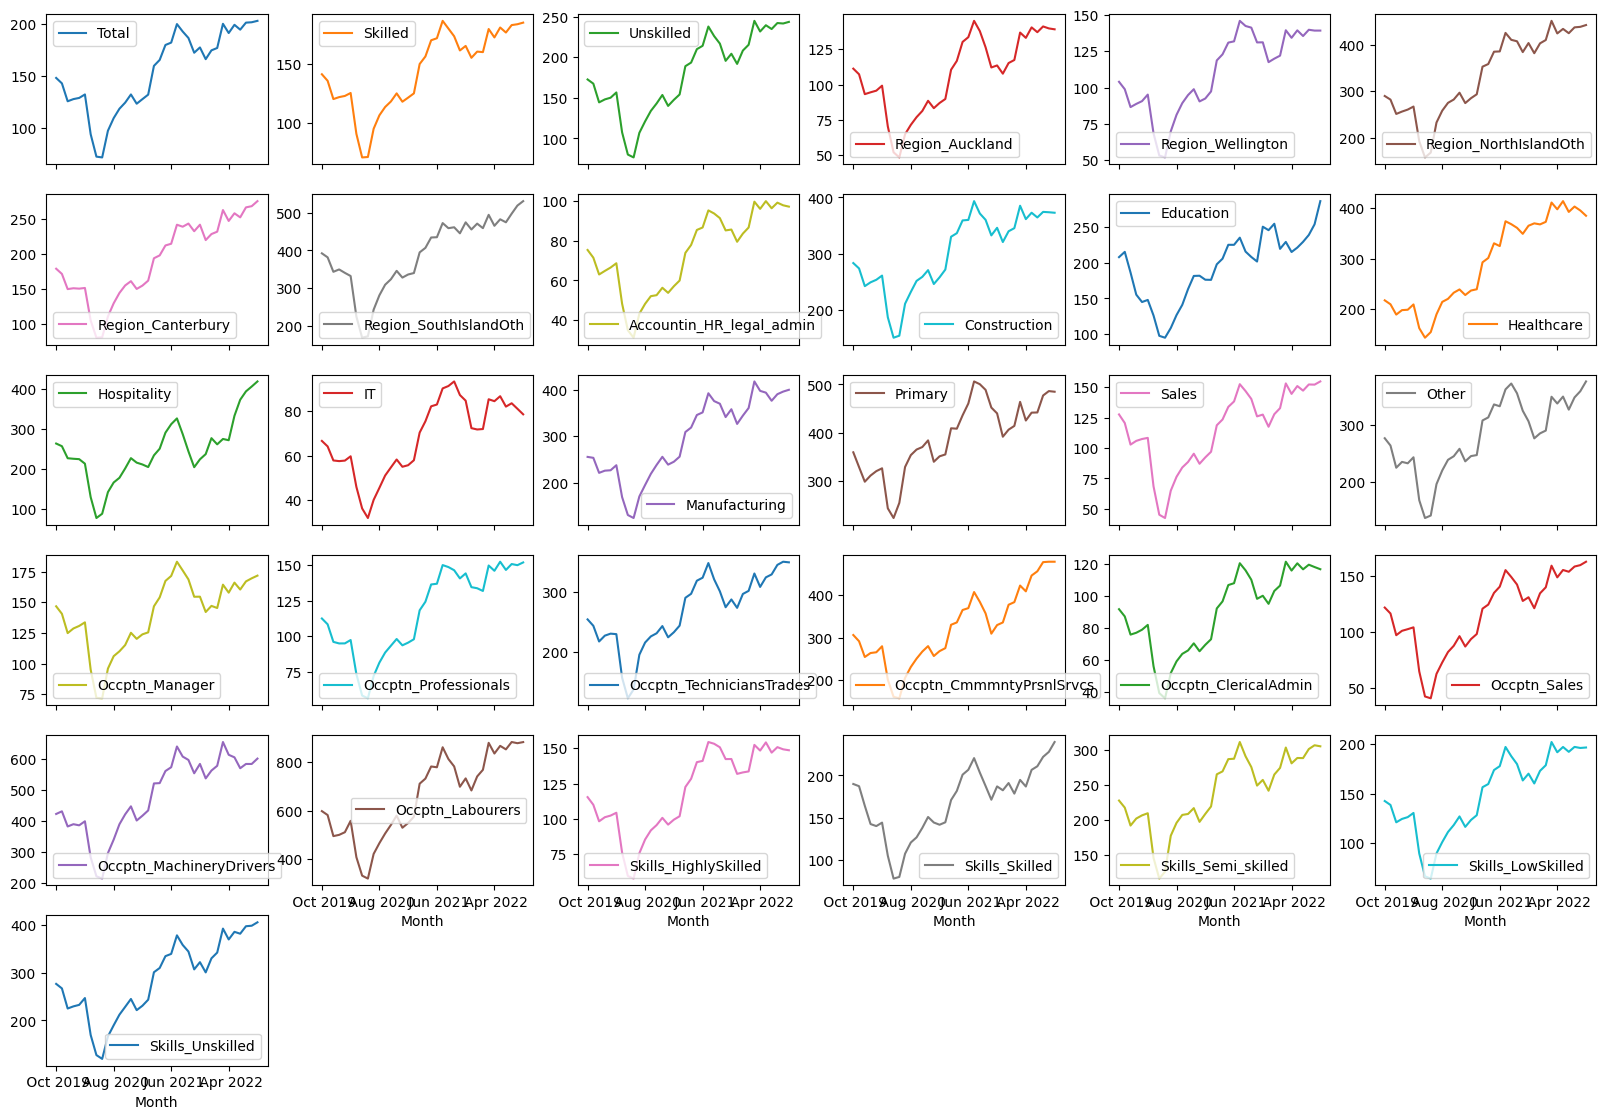

In [103]:
# create a seasonally adjusted dataframe
df_sa = df.rolling(3).mean()

# tidy up industry columns for display in charts
cols = list(df_sa.columns)
cols = [col.replace("Industry_", "") for col in cols]
df_sa.columns = cols

# plot past 24 months data
df_sa.tail(36).plot(subplots=True, layout=(7,6), figsize=(20,16))
plt.show()

df_sa.to_csv('publish/jobs-online-3m-sa.csv')

In [84]:
df.to_csv('publish/jobs-online-raw-sa.csv') 

# this dataset saves to google drive and used to create charts
# https://app.flourish.studio/visualisation/11492162/edit
# and https://app.flourish.studio/visualisation/11468584/edit